## KMeans Clustering

Kmeans Clustering is an unsupervised machine learning algorithm that groups similar data points via clusters, which are centroids that encompass similiary-valued points.

The algorithm works by assigning points to the nearest cluster, then recalculating the mean of each cluster and replacing the centroid of the cluster with the mean. The process stops when a specific tolerance is reached.

In [454]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

In [455]:
class KMeans:

    def __init__(self, k, tol, max_iters=300):

        self.k = k
        self.tol = tol
        self.cluster_centers__ = []
        self.max_iters = max_iters
        self.min_max_featvals = None

    def init_clusters(self, data):

        self.min_max_feat_vals = [(data[feat].min(), data[feat].max()) for feat in data.columns]

        for _ in range(self.k):

            cls_center = [np.random.uniform(MIN, MAX)  for MIN, MAX in self.min_max_feat_vals]

            while cls_center in self.cluster_centers__: #doesnt work for numpy arrays

                cls_center = [(MAX-MIN) * np.random.randn() + MIN  for MIN, MAX in self.min_max_feat_vals]
            
            self.cluster_centers__.append(cls_center)
    
    def fit(self, data):

        self.init_clusters(data)
        
        iters = 0

        total_tol = float("inf")

        while total_tol > self.tol*self.k and iters < self.max_iters:

            total_tol = 0

            assigned_points = [[] for _ in range(self.k)]

            for row in data.to_numpy():

                cluster_idx, min_dist = 0, float("inf")

                for cls_idx, cls_center in enumerate(self.cluster_centers__):

                    dist = np.sum((row - np.array(cls_center))**2) ** (1/2)

                    if dist < min_dist:

                        cluster_idx = cls_idx
                        min_dist = dist
                
                assigned_points[cluster_idx].append(row)
            
            for k in range(len(self.cluster_centers__)):

                cls_points = np.array(assigned_points[k])
                new_center = np.mean(cls_points, axis=0)

                if cls_points.size == 0:

                    new_center = data.sample(n=1).values[0]

                total_tol += np.sum((new_center - np.array(self.cluster_centers__[k]))**2)**(1/2)
                
                self.cluster_centers__[k] = new_center
            
            iters += 1
        
        
        








    


[array([ 9.23867764, -3.84554161]), array([ 1.07918001, -3.44827289])]


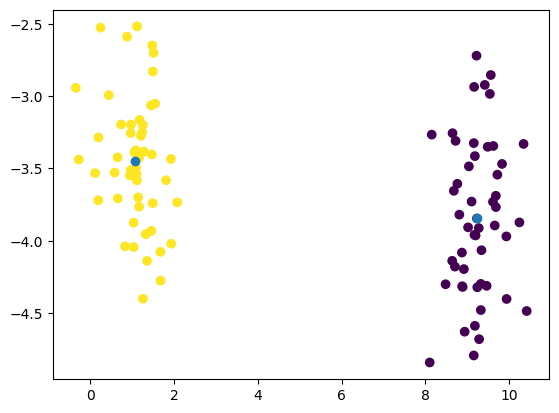

In [456]:
points, c = make_blobs(n_samples=100, cluster_std=0.5, centers=2)

kmeans = KMeans(2, 5, max_iters=300)
kmeans.fit(pd.DataFrame(points))
cls_centers = np.array(kmeans.cluster_centers__)

print(kmeans.cluster_centers__)


plt.scatter(points[:, 0], points[:, 1], c=c)
plt.scatter(cls_centers[:, 0], cls_centers[:, 1])